In [37]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import pyplot
import seaborn

sns.set(rc={'figure.figsize':(11.7,8.27)})


#Read in the dataset
train = pd.read_csv('data1.csv')

In [38]:
#Check if any of the rows is missing
train.isnull()

,Fire_Sprinkler,Building_Occupancy,Room_Name,Room_Area,Smoke_Detector
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


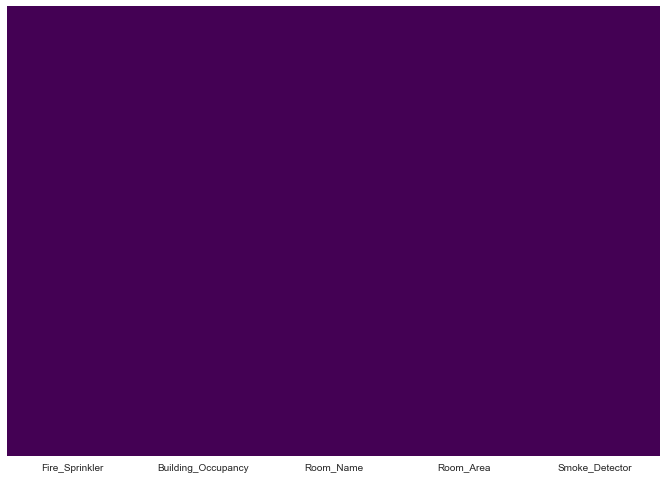

In [39]:
#visualize if cell is missing
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

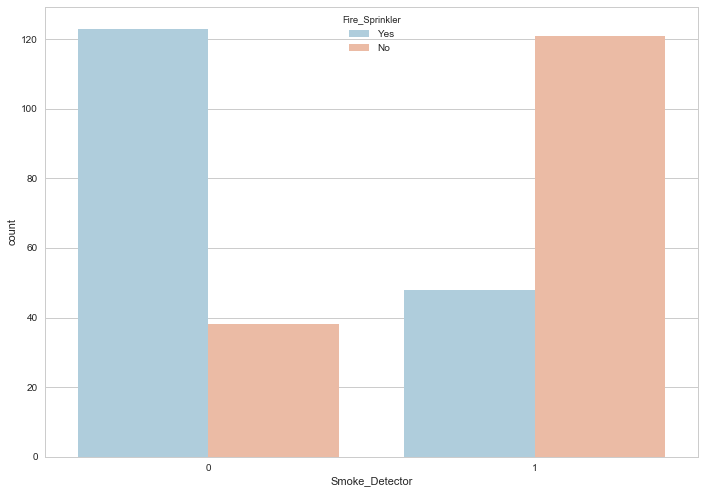

In [40]:
#barchart showing the relationship between Fire Sprinklers and Smoke Detectors
sns.set_style('whitegrid')
sns.countplot(x='Smoke_Detector',hue='Fire_Sprinkler',data=train,palette='RdBu_r')

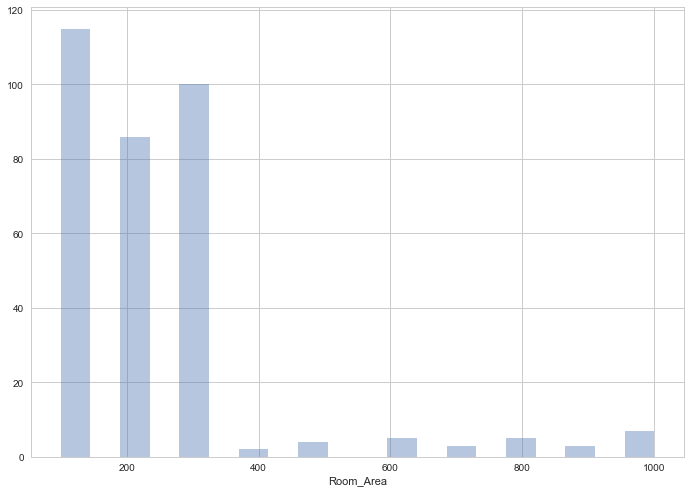

In [41]:
#barchart showing the distribution of Room area
sns.distplot(train['Room_Area'].dropna(),kde=False,bins=20)

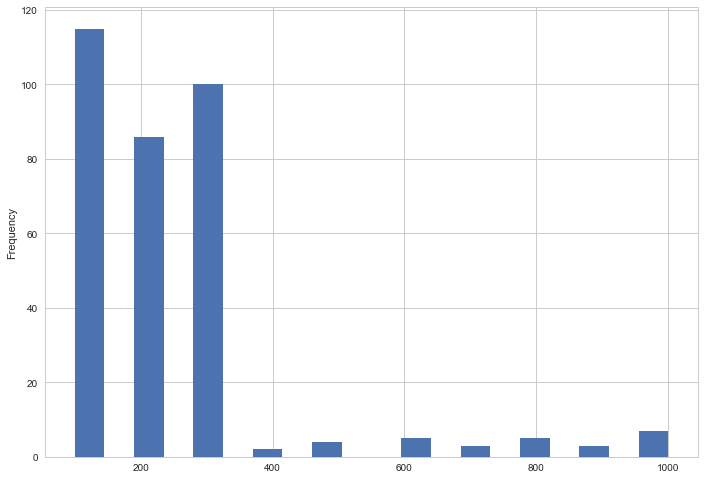

In [42]:
#barchart showing the distribution of Room area
train['Room_Area'].plot.hist(bins=20)

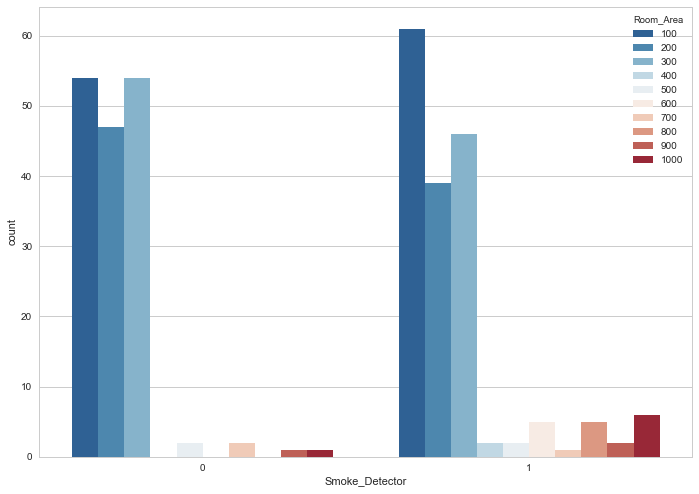

In [43]:
#barchart showing the distribution of Room area in relation of smoke detector
sns.countplot(x='Smoke_Detector',hue='Room_Area',data=train,palette='RdBu_r')

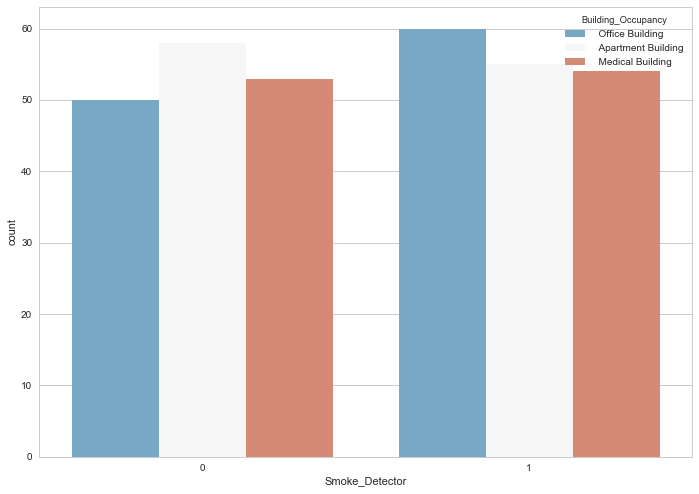

In [44]:
#barchart showing the distribution of building occupancy in relationship of smoke detectors
sns.countplot(x='Smoke_Detector',hue='Building_Occupancy',data=train,palette='RdBu_r')

In [45]:
#Preprocess the dataset using get_dummies
RoomName=pd.get_dummies(train['Room_Name'])
BuildingOccupancy=pd.get_dummies(train['Building_Occupancy'])
FireSprinkler=pd.get_dummies(train['Fire_Sprinkler'], drop_first=True)
SmokeDetector=pd.get_dummies(train['Smoke_Detector'], drop_first=True)
train=pd.concat([RoomName,BuildingOccupancy,FireSprinkler,train['Room_Area'],SmokeDetector],axis=1)
Y=train[1]
X=train.drop(1,axis=1)

In [47]:
#Split the dataset to test and train data
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [48]:
#Fit the training data to the Logistic Regression classifier algorithm and produce classification prediction of the test data
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

logmodel.fit(X_train,Y_train)

predictions_log=logmodel.predict(X_test)

In [49]:
#Confusion matrix and Classification report of the Logistic Regression classifier
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions_log))
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions_log)

             precision    recall  f1-score   support

          0       0.98      0.82      0.89        49
          1       0.84      0.98      0.91        50

avg / total       0.91      0.90      0.90        99



array([[40,  9],
       [ 1, 49]])

In [50]:
#R-squared score of the logistic regression score
print("r-squared score:", logmodel.score(X_train,Y_train))

('r-squared score:', 0.948051948051948)


In [51]:
#list of the scores that will appended from the for loop using the mean_max_min function below
precision_list=[]
recall_list=[]
f1_score_list=[]
support_list=[]

#function to append the scores to each list
def mean_max_min(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split('      ')
        precision_list.append(float(row_data[2]))
        recall_list.append(float(row_data[3]))
        f1_score_list.append(float(row_data[4]))
        support_list.append(float(row_data[5]))

#loop of random state integers from 1-150 
for i in range(1,150):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=i)
    logmodel=LogisticRegression()
    logmodel.fit(X_train,Y_train)
    pred_i=logmodel.predict(X_test)
    report = classification_report(Y_test,pred_i)
    mean_max_min(report)

In [52]:
#print out the scores min max and mean

print('minimum precision: ',min(precision_list))
print('maximum precision: ',max(precision_list))
print('mean precision',sum(precision_list)/len(precision_list))

print('minimum recall: ',min(recall_list))
print('maximum recall: ',max(recall_list))
print('mean recall',sum(recall_list)/len(recall_list))

print('minimum F1 Score: ',min(f1_score_list))
print('maximum F1 Score: ',max(f1_score_list))
print('mean F1 Score',sum(f1_score_list)/len(f1_score_list))

print('minimum support: ',min(support_list))
print('maximum support: ',max(support_list))
print('mean support',sum(support_list)/len(support_list))

('minimum precision: ', 0.72)
('maximum precision: ', 1.0)
('mean precision', 0.8890268456375834)
('minimum recall: ', 0.76)
('maximum recall: ', 1.0)
('mean recall', 0.8890268456375835)
('minimum F1 Score: ', 0.77)
('maximum F1 Score: ', 0.95)
('mean F1 Score', 0.8876845637583886)
('minimum support: ', 39.0)
('maximum support: ', 60.0)
('mean support', 49.5)


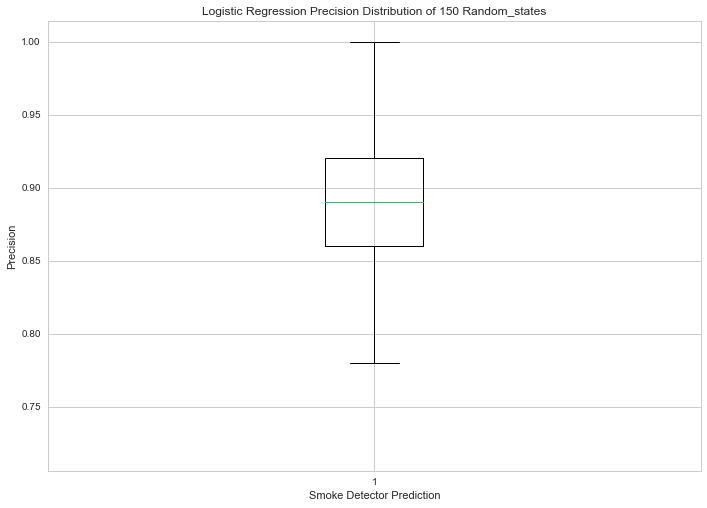

In [53]:
#visualize the precision distribution
plt.boxplot(precision_list)
plt.title('Logistic Regression Precision Distribution of 150 Random_states')
plt.xlabel('Smoke Detector Prediction')
plt.ylabel('Precision')
plt.show()